# Importaçoes

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# GERANDO A MATRIZ DE CONFUSÃO

In [2]:
%load_ext tensorboard

In [3]:
logdir = 'log'

In [4]:
(train_images, train_labels),(test_images,test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
#

In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x=train_images,y=train_labels,epochs=5,validation_data=(test_images,test_labels))


Epoch 1/5


1875/1875 [==============================] - 38s 17ms/step - loss: 0.1493 - accuracy: 0.9527 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0451 - accuracy: 0.9854 - val_loss: 0.0375 - val_accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.0317 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.0292 - val_accuracy: 0.9900


In [9]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 [==============================] - 2s 5ms/step


In [10]:
classes = [0,1,2,3,4,5,6,7,8,9]

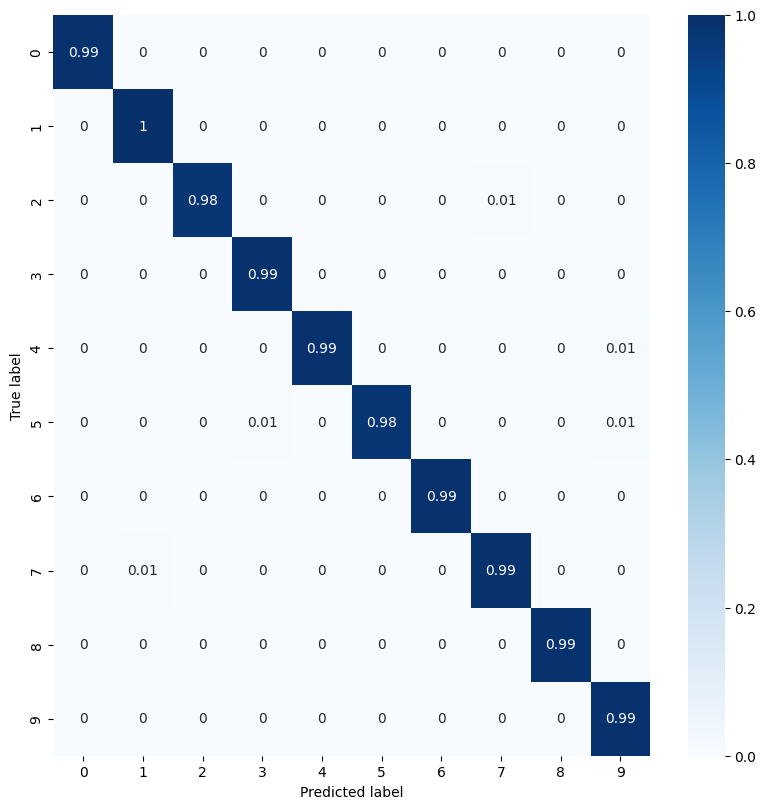

In [11]:
con_mat = tf.math.confusion_matrix(labels=y_true,predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes, 
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculando as metricas

In [12]:
# Acurácia
accuracy = accuracy_score(y_true, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 0.99


In [13]:
# Precisão
precision = precision_score(y_true, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
print(f"Precisão: {precision}")

Precisão: 0.9900471614652575


In [14]:
# Sensibilidade (Recall)
recall = recall_score(y_true, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
print(f"Sensibilidade (Recall): {recall}")

Sensibilidade (Recall): 0.99


In [ ]:
# F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
print(f"F1-Score: {f1}")

F1-Score: 0.9900006366855288


In [16]:
cm = confusion_matrix(y_true, y_pred)

# Função para calcular a especificidade
def calculate_specificity(cm, class_label):
  tn = cm[class_label, class_label]  # Verdadeiros negativos para a classe
  fp = cm[:, class_label].sum() - tn  # Falsos positivos para a classe

  # Evitar divisão por zero
  if (tn + fp) == 0:
    return 0.0  

  specificity = tn / (tn + fp)
  return specificity


In [17]:
specificities = []
total_specificity = 0

for i in range(10):  # Considerando 10 classes (dígitos de 0 a 9)
  specificity = calculate_specificity(cm, class_label=i)
  specificities.append(specificity)
  total_specificity += specificity

  # Imprimir a especificidade da classe atual
  print(f"Especificidade (Classe {i}): {specificity:.4f}")

Especificidade (Classe 0): 0.9939
Especificidade (Classe 1): 0.9904
Especificidade (Classe 2): 0.9961
Especificidade (Classe 3): 0.9911
Especificidade (Classe 4): 0.9878
Especificidade (Classe 5): 0.9943
Especificidade (Classe 6): 0.9948
Especificidade (Classe 7): 0.9883
Especificidade (Classe 8): 0.9897
Especificidade (Classe 9): 0.9747
